Używane biblioteki

In [1]:
import math
import copy
import matplotlib.pyplot as plt
import numpy as np

Interpolacja Lagrange'a

Wielomian interpolacyjny newtona:
P(x) = L0(x) * y0 + L1(x) * y0 + ... Ln * yn

In [2]:
def lagrange_interpolation(xs, ys, x): 

    if len(xs) != len(ys): return

    P = 0 #Value of a polynomial at point x

    for i in range(len(xs)):

        L = 1 #lagrange's base

        for j in range(len(xs)):

            if xs[i] != xs[j]: 

                L *= (x - xs[j]) / (xs[i] - xs[j])

        P += (L * ys[i])

    return P

Iterpolacja Newtona - metoda ilorazów skończonych

Wielomian interpolacyjny Newtona:

Pn(x) = a0 + a1(x - x0) + a2(x - x0)(x - x1) + ... + an(x - x0)(x - x1)(x - xn)

Wielomian interpolacyjny z ilorazami różnicowymi

Pn(x) = f[x0] + (x - x0)f[x0, x1] + (x - x0)(x - x1)f[x0, x1, x2] + ... + (x - x0)(x - x1)...(x-xn-1)f[x0, x1, ..., xn]

In [3]:
def newton_interpolation(xs, ys, x):

    if len(xs) != len(ys): return

    coefficients = [ys[0]]

    #Dfference quotients array
    diffs = copy.deepcopy(ys)
    
    for i in range(len(xs) -2, -1, -1):

        for j in range(0, i + 1):
            
            diffs[j] = (diffs[j+1] - diffs[j]) / (xs[j + ((len(xs) - i) - 1)] - xs[j])

        coefficients.append(diffs[0])

    #horner
    result = coefficients[-1]

    for i in range(len(coefficients) - 2, -1, -1):
        result = result * (x - xs[i]) + coefficients[i]

    return result

Równomiernie rozłożone punkty

In [4]:
#return evenly distrubuted x arguments on [a, b]
def get_evenly_distributed(a, b, n = 100):
    
    length = abs(b - a)
    h = length / (n - 1)
    
    return [a + i * h for i in range(n - 1)] + [b]

Zera wielomianu Czebyszewa - Inaczej węzły Czebyszewa. Są często używane jako węzły w interpolacji wielomianowej,
ponieważ wynikowy wielomian interpolacyjny minimalizuje efekt Rungego, czyli duże oscylacje wielomianu interpolacyjnego przy krańcach przedziału.

Reference: https://pl.wikipedia.org/wiki/W%C4%99z%C5%82y_Czebyszewa

In [5]:
def get_chebyshev_nodes(a, b, n):

    nodes = []

    for k in range(1, n + 1): #n + 1, because range is exclusive on the right side

        nodes.append( 0.5 * (a + b) + 0.5 * (b - a) *  math.cos( ( (2 * k - 1) / (2 * n) ) * math.pi ) )
    
    return nodes[::-1] #Flipping an array in order to it being consistent with input range

Interpolacja Hermite'a

Zakladam, ze input jest postaci

xs = [x1, x2, x3, x4, ...]
ys = [ [y1, y1', y1'', ...], ... ], czyli do kazdego x-a przypisana jest lista y-ów, z której każdy kolejny oznacza wartość w kolejnej pochodnej

In [6]:
#Funkcja pomocnicza do wypisywania macierzy z wartościami
def pretty_print(array):
    
    for row in array:
        for el in row:
            print(el, end = ' ')
        print("")

In [7]:
def hermite_interpolation(xs, ys, x):

    #Tworzy wektor z wartośami [x1, x1, x1, x2, x2, ...], gdzie ilośc xi to ilość wartości funkcji i pochodnych dla danego x-a
    x_map = []
    for i, mi in enumerate(ys):
        for _ in range(len(mi)):
            x_map.append(xs[i])

    #Wyznaczam sumę krotności
    m = sum([len(mi) for mi in ys])
    
    #Tworzę początkową macierz
    A = [[ None for j in range(m)] for i in range(m)]
    
    #Wypełniam macierz znanym wartościami f(x)
    current_row = 0
    for mi in ys:
        for j in range(len(mi)):
            A[current_row][0] = mi[0]
            current_row += 1
            
    #Wypełniam macierz znanymi wartościami pochodnych
    row = 0
    for mi in ys:
        for i in range(len(mi)):
            for j in range(1, i + 1):
                A[row][j] = mi[j] / math.factorial(j)
            row += 1
            
    #Wypełniam macierz wylioczonymi różnicami i wyliczam wspolczynniki
    coefficients = [A[0][0]]
    for i in range(1, m): #Aktualna pozycja do ktorej zmierzamy
        for j in range(1, i + 1):
            if A[i][j] == None:
                A[i][j] = (A[i][j - 1] - A[i - 1][j - 1]) / (x_map[i] - x_map[i - j])
        coefficients.append(A[i][i])
        
    #pretty_print(A)
    
    diffs = [x - xi for xi in x_map]
    
    w = coefficients[0]
    
    for i in range(1, m):
        
        temp = coefficients[i]
        
        for j in range(0, i):
            temp *= diffs[j]
            
        w += temp
        
    return w  

Rysowanie wykresu funkcji zadanej wzorem

In [8]:
def plot_function(func, range_a, range_b, func_x = None):
    
    if func_x == None:
        func_x = np.linspace(range_a, range_b, 10000)
        
    func_y = [func(func_x[i]) for i in range(len(func_x))]

    plt.plot(func_x, func_y, label = "Zadana funkcja", color = 'blue')

    plt.legend()
    plt.grid(True)
    plt.savefig("zadana_funkcja.png")

Zadana funkcja

f(x) = 10 * m + x^2 / k - 10 * m * cos(kx)

k = 1.5
m = 3
x z przedzialu [-4pi, 4pi]

In [9]:
f_range_a = -4 * math.pi
f_range_b = 4 * math.pi

In [10]:
def f(x):
    return 30 + (x**2 / 1.5) - 30 * math.cos(1.5 * x)

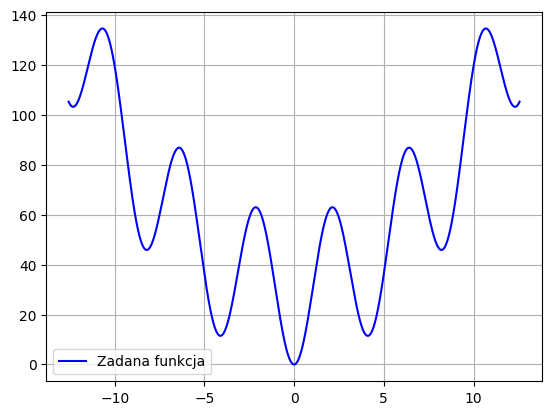

In [11]:
plot_function(f, f_range_a, f_range_b)
plt.show()

Pierwsza pochodna funkcji f(x)

g(x) = f'(x) = 45 * sin(1.5 * x) + 4x / 3

In [12]:
def g(x):
    return 45 * math.sin(1.5 * x) + ( (4 * x) / 3)

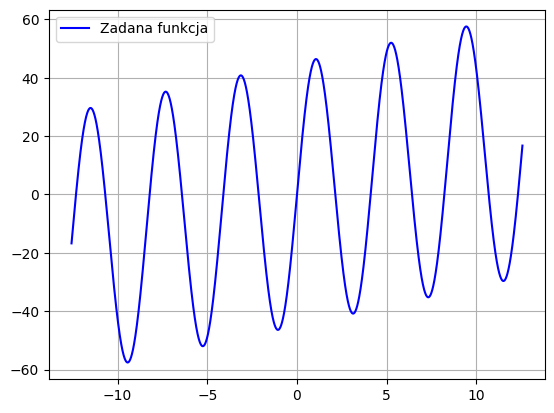

In [13]:
plot_function(g, f_range_a, f_range_b)
plt.show()

Interpolacja

In [14]:
def interpolate(interpolation_function, point_generation_function, n, test_points_count = 1000, nodes_plot_label = 'Węzły'):
    
    xs = point_generation_function(f_range_a, f_range_b, n)

    if interpolation_function == hermite_interpolation:
        ys = [(f(xs[i]), g(xs[i])) for i in range(len(xs))]
    else:
        ys = [f(xs[i]) for i in range(len(xs))]

    check_x = get_evenly_distributed(f_range_a, f_range_b, test_points_count)
    check_y = []

    for i in range(len(check_x)):

        check_y.append(interpolation_function(xs, ys, check_x[i]))

    plot_function(f, f_range_a, f_range_b)
    plt.plot(check_x, check_y, color = 'red', label = "Funkcja interpolująca")
    if interpolation_function ==hermite_interpolation:
        plt.scatter(xs, np.array(ys)[:, 0], color = 'black', label=nodes_plot_label)
    else:
        plt.scatter(xs, ys, color = 'black', label=nodes_plot_label)
    
    plt.legend()
    plt.grid(True)
    plt.savefig("interpolacja.png")
    plt.show()


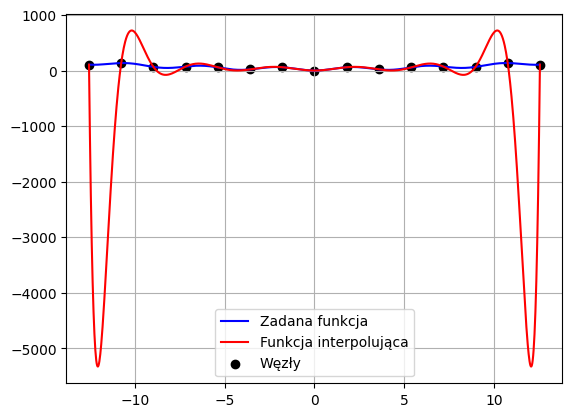

In [15]:
interpolate(lagrange_interpolation, get_evenly_distributed, 15)

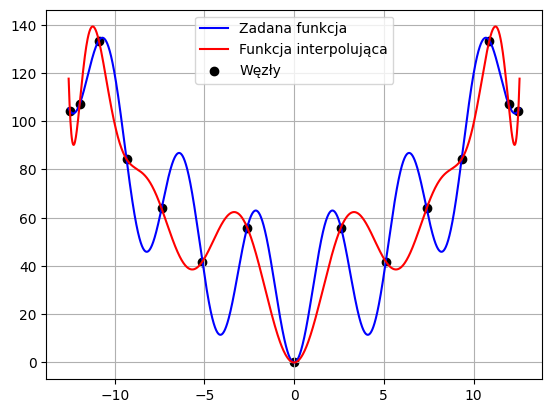

In [16]:
interpolate(lagrange_interpolation, get_chebyshev_nodes, 15)

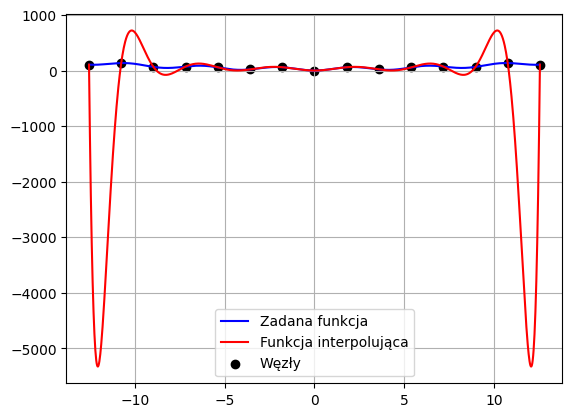

In [17]:
interpolate(newton_interpolation, get_evenly_distributed, 15)

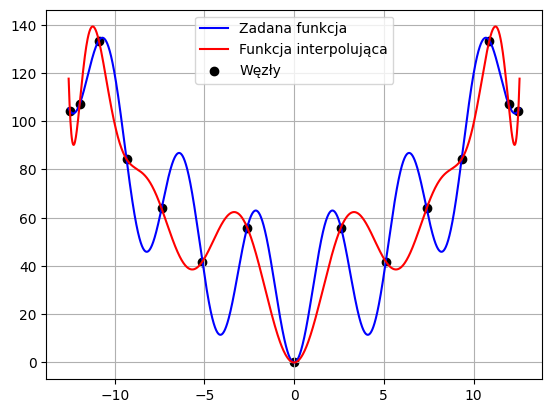

In [18]:
interpolate(newton_interpolation, get_chebyshev_nodes, 15)

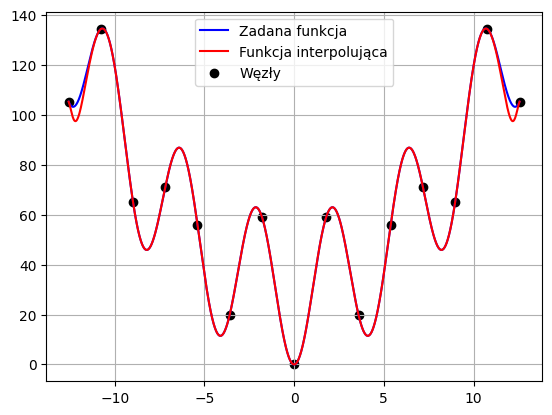

In [19]:
interpolate(hermite_interpolation, get_evenly_distributed, 15)

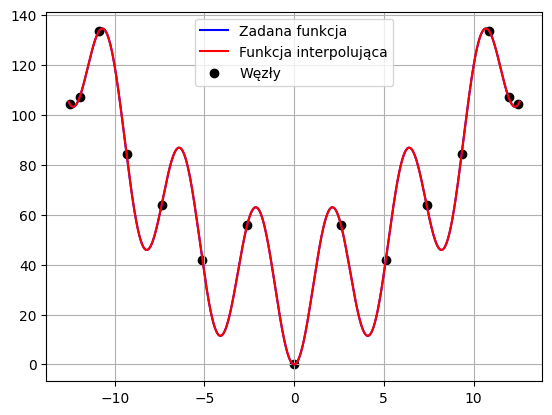

In [20]:
interpolate(hermite_interpolation, get_chebyshev_nodes, 15)

Różnica między wielomianem interpolowanym, a wielomienaem interpolującym

1. Maksimum

max na x należącym do [-4pi, 4pi] z |F(x) - Pn(x)|

2. Błąd średniokwadratowy

!/N suma (F(x) - Pn(x))^2

1. Maksumum

1.1 Różnica maksimum dla interpolacji Hermite'a z równomiernie wygenerowanymi węzłami

In [21]:
def interpolation_maximum_difference(interpolation_function, point_generation_function, test_points_count, interpolation_range_a, intepolation_range_b):

    #Wartości n do przetestowania od 3 do 30
    N = [i for i in range(interpolation_range_a, intepolation_range_b + 1)]

    for i in range(len(N)):

        maksimum = float('-inf')

        #Evenly distributed xs
        xs = point_generation_function(f_range_a, f_range_b, N[i])
        if interpolation_function == hermite_interpolation:
            ys = [ (f(xs[i]), g(xs[i])) for i in range(len(xs))]
        else:
            ys = [f(xs[i]) for i in range(len(xs))]

        test_x = get_evenly_distributed(f_range_a, f_range_b, test_points_count)
        
        for j in range(test_points_count):

            temp = abs(f(test_x[j]) - interpolation_function(xs, ys, test_x[j]))

            maksimum = temp if temp > maksimum else maksimum
    
        print(f"{maksimum}")

Liczba węzłów od 3 do 30

In [22]:
interpolation_maximum_difference(lagrange_interpolation, get_evenly_distributed, 1000, 3, 30)

59.99866494451233
59.99866494451233
79.10274521603786
59.544049793340825
59.99866494451234
59.98332765229924
46.3393319367777
87.0707003052243
432.1095884663853
275.2502251042611
2675.532194570988
692.4731371549957
5428.9486383151625
2486.945518794252
6245.165299475247
3401.320450106511
4855.062515509533
2876.005879014802
2783.884136437149
1734.8542339390647
1243.0388422984672
799.4310358571277
447.57597115944964
294.4918054465344
133.48740769671755
89.36135324541554
33.61891954562316
22.822364183413228


In [23]:
interpolation_maximum_difference(lagrange_interpolation, get_chebyshev_nodes, 1000, 3, 30)

72.64250345658007
50.253888395184106
56.80816174269654
54.52857743041818
55.04581340044578
63.209755337423566
64.15438627229435
64.25177156804227
57.12295689109577
61.27650135763643
57.50068970044197
73.3439742849674
46.14379846805524
58.33469495756625
26.61726964847538
30.78970672018437
10.995912118275918
11.542434467375058
3.4397025368894845
3.250909406562307
0.8348324917244554
0.7169977482207028
0.16285377204542328
0.12771813781837185
0.025817149359852465
0.018815428082973484
0.0033892696719419746
0.002335873291423596


In [24]:
interpolation_maximum_difference(newton_interpolation, get_evenly_distributed, 1000, 3, 30)

59.99866494451233
59.99866494451234
79.10274521603783
59.54404979334081
59.99866494451237
59.98332765229924
46.339331936777754
87.0707003052259
432.1095884663957
275.2502251042613
2675.5321945709816
692.4731371555825
5428.94863831516
2486.9455187951403
6245.165299483856
3401.320450131733
4855.062515587796
2876.005879120314
2783.8841364371306
1734.854234048541
1243.0388422983965
799.4310358569255
447.5759712864261
294.49180623715654
133.4874076937429
89.36135324469673
33.618919535343764
22.82236416908691


In [25]:
interpolation_maximum_difference(newton_interpolation, get_chebyshev_nodes, 1000, 3, 30)

72.64250345658007
50.25388839518409
56.808161742696555
54.528577430418196
55.04581340044574
63.209755337423616
64.15438627229555
64.25177156804216
57.122956891095654
61.276501357636974
57.50068970046395
73.34397428496973
46.1437984680679
58.33469495757428
26.617269649062692
30.78970672018467
10.995912123210829
11.542434467444743
3.4397025416513003
3.250909406633202
0.8348324917243701
0.7169977482226599
0.1628540821683373
0.127718137882173
0.02581789884573027
0.018815428503220488
0.0033892696718567095
0.0023358740039967074


In [27]:
interpolation_maximum_difference(hermite_interpolation, get_evenly_distributed, 1000, 3, 30)

59.998664944512306
59.9986649445126
49.7956123162688
225.22503911334
59.99866494451386
784.6180626866017
1189.120325710208
1009.2933583229004
593.1590567656885
263.88757570500786
93.37748721451985
27.163128899892797
6.647148448161644
1.3915894241701494
0.25336123446678016
0.040475075437555574
0.0057288042423664365
0.0010326456576876808
0.0004611592085694838
0.0010637449786514708
0.001635977529616639
0.0014555131479738748
0.0035517809408389667
0.0014553071712981591
0.003298483327256463
0.005008504391923907
0.007506891229468238
0.03331847026454682


In [28]:
interpolation_maximum_difference(hermite_interpolation, get_chebyshev_nodes, 1000, 3, 30)

79.64971054530126
139.1125369639632
94.1425256895707
119.68872311513877
96.9158105247455
116.67587958925225
56.92762792276713
23.08718239940716
6.339504707239485
1.4342024554823203
0.2526956781405616
0.03763824942302561
0.004647111764782608
0.0004963667966858473
0.0002819789098680303
0.0005853736193870418
0.0007916919474979522
0.001561307460733019
0.001964012261552739
0.002942638073506032
0.007316377437447841
0.011653203015072222
0.010951117915212194
0.021355593437291986
0.021978681864752048
0.045639334280721755
0.02681266281295791
0.045996451189154186


Liczba węzłów od 31 do 50

In [29]:
interpolation_maximum_difference(lagrange_interpolation, get_evenly_distributed, 1000, 31, 50)

7.248324276169839
4.978209252817024
1.3637289881107648
0.9423173054379674
0.22428594238822086
0.15635442996190818
0.03284552121840534
0.022988789710467472
0.004278979919760673
0.003013490160924448
0.000542218263376526
0.00042877294991683357
0.00016155836900111353
0.00033132683219605497
0.0005572950271357513
0.0011193417123251947
0.002469388575647713
0.002997332926213403
0.008143364189464819
0.01225925119990734


In [30]:
interpolation_maximum_difference(lagrange_interpolation, get_chebyshev_nodes, 1000, 31, 50)

0.0003761201992773522
0.00024811986837838806
3.585156156304947e-05
2.283580240294847e-05
2.9732376276569994e-06
1.8404186916121112e-06
2.168192452245421e-07
1.3106805461793325e-07
1.4027946804162639e-08
8.313061683473677e-09
8.113829608191736e-10
4.728235025730498e-10
4.219202764943475e-11
2.4263535625124177e-11
2.0747847884194925e-12
1.1937117960769683e-12
3.694822225952521e-13
2.7000623958883807e-13
2.7000623958883807e-13
2.7000623958883807e-13


In [31]:
interpolation_maximum_difference(newton_interpolation, get_evenly_distributed, 1000, 31, 50)

7.248324252545331
4.978209226292549
1.363729064413846
0.942327726258938
0.2242886419920893
0.15636518799729515
0.03284564869248641
0.02298812507605419
0.004286776709875539
0.003034348978118828
0.0005313057897637918
0.00044879756184457165
0.00010909281184012798
9.01403938655676e-05
0.00016999167768005918
0.00013771150702268642
0.00021026223335240957
0.00020433215354387357
0.0002373067974588139
0.0006088949062359461


In [32]:
interpolation_maximum_difference(newton_interpolation, get_chebyshev_nodes, 1000, 31, 50)

0.0003787611458392348
0.00024812020693687487
5.3661844589214525e-05
8.070229213785751e-05
8.087760380703912e-05
8.982130019319357e-05
9.615378566252275e-05
0.00019806449472525856
0.0002983023715756872
0.00029939067965756294
0.00038823269701993013
0.0006472300636914952
0.0006574870639184383
0.0005490073042722088
0.0008286910457400154
0.0019317972875825262
0.001876320441539292
0.0014425436439324812
0.0022287699587053567
0.0026070393690389437


In [33]:
interpolation_maximum_difference(hermite_interpolation, get_evenly_distributed, 1000, 31, 50)

0.10457966472685598
0.053398131049405606
0.6741767986063394
3.092821251700485
34.44718853051022
69.42667348953609
1550.3562191442984
39119.97142326401
128611.25667149702
662472.6295959348
6881676.5565476455
23994937.12071554
327827719.6135713
3675617932.2641826
45649930264.03531
1106600236468.6416
1749805447100.6284
41056817088311.28
323163380622031.94
1787317770553203.2


In [34]:
interpolation_maximum_difference(lagrange_interpolation, get_chebyshev_nodes, 1000, 31, 50)

0.0003761201992773522
0.00024811986837838806
3.585156156304947e-05
2.283580240294847e-05
2.9732376276569994e-06
1.8404186916121112e-06
2.168192452245421e-07
1.3106805461793325e-07
1.4027946804162639e-08
8.313061683473677e-09
8.113829608191736e-10
4.728235025730498e-10
4.219202764943475e-11
2.4263535625124177e-11
2.0747847884194925e-12
1.1937117960769683e-12
3.694822225952521e-13
2.7000623958883807e-13
2.7000623958883807e-13
2.7000623958883807e-13


2. Błąd średniokwadratowy

In [35]:
def interpolation_mean_difference(interpolation_function, point_generation_function, test_points_count, interpolation_range_a, intepolation_range_b):

    #Wartości n do przetestowania od 3 do 30
    N = [i for i in range(interpolation_range_a, intepolation_range_b + 1)]

    for i in range(len(N)):

        suma = 0

        #Evenly distributed xs
        xs = point_generation_function(f_range_a, f_range_b, N[i])

        if interpolation_function == hermite_interpolation:
            ys = [ (f(xs[i]), g(xs[i])) for i in range(len(xs))]
        else:
            ys = [f(xs[i]) for i in range(len(xs))]

        test_x = get_evenly_distributed(f_range_a, f_range_b, test_points_count)
        
        for j in range(test_points_count):

            suma += (f(test_x[j]) - interpolation_function(xs, ys, test_x[j])) ** 2
    
        print(f"{suma / test_points_count}")

Wężły od 3 do 30

In [36]:
interpolation_mean_difference(lagrange_interpolation, get_evenly_distributed, 1000, 3, 30)

1348.6499999999985
1348.6499999999987
1284.9229081356216
926.3865101408779
1348.6499999999985
897.4519337516629
850.9355556984665
1886.309236392329
18918.64456208366
6706.342390896908
531738.1929584887
34521.64893763166
1786147.5815064595
355627.6224411514
1999882.5977893367
565062.5706107061
1047210.9372952617
351959.4603801114
303812.6932804963
113273.08920198637
54103.14177527047
21610.53048661355
6337.3839964478075
2658.3503279248457
513.3733346018715
223.34386720386627
29.88030189125656
13.370541317585324


In [37]:
interpolation_mean_difference(lagrange_interpolation, get_chebyshev_nodes, 1000, 3, 30)

981.377579792222
694.4297869596238
708.267264455637
713.7392517912432
766.4267567232658
860.1827799323668
998.0056040384796
829.4238641735864
737.8470463804014
694.3009371302652
600.9644354909683
595.5398920072695
546.2171137184844
485.2672502337951
224.60201727712152
185.56736511109227
40.770721818905066
32.516295737441894
3.832805206421005
2.998574653699404
0.20985206807929851
0.16226276397568196
0.007257151949043574
0.0055679290861664005
0.00016806584276445825
0.00012823864768316556
2.7241251133552243e-06
2.070110607311082e-06


In [38]:
interpolation_mean_difference(newton_interpolation, get_evenly_distributed, 1000, 3, 30)

1348.6499999999985
1348.6499999999992
1284.9229081356211
926.3865101408785
1348.6499999999987
897.4519337516628
850.9355556984668
1886.3092363923313
18918.644562084057
6706.342390895771
531738.1929584028
34521.64893765869
1786147.581506252
355627.6224412476
1999882.597789161
565062.5706137568
1047210.9373094225
351959.4603895753
303812.6932782207
113273.08920724226
54103.141775132215
21610.530487026874
6337.383991162863
2658.350327634612
513.373328710636
223.34386624325626
29.88030014901397
13.370540673885886


In [39]:
interpolation_mean_difference(newton_interpolation, get_chebyshev_nodes, 1000, 3, 30)

981.3775797922228
694.4297869596237
708.2672644556366
713.7392517912429
766.4267567232658
860.1827799323719
998.0056040384918
829.4238641735755
737.8470463803985
694.3009371302553
600.9644354909277
595.5398920071945
546.217113718549
485.2672502338431
224.60201727673882
185.56736511046364
40.77072182001511
32.51629573698405
3.832805205663313
2.9985746544869016
0.2098520694221733
0.16226276539277204
0.007257152002536595
0.0055679299803039145
0.0001680661677666081
0.00012823846401112716
2.7242051298514883e-06
2.070082288202089e-06


In [40]:
interpolation_mean_difference(hermite_interpolation, get_evenly_distributed, 1000, 3, 30)

1348.6499999999962
1348.6499999999974
923.2303338452006
8382.722496071776
1348.6500000000042
62629.17050438974
119582.38037314294
74267.20112630526
22553.238293971674
3977.6023733520087
448.8926430581497
34.53311683441119
1.8943800084766198
0.07666988367939497
0.0023514895034487345
5.5868993648296904e-05
1.0405515706473779e-06
1.7468453792713638e-08
2.373027876918447e-09
4.624223160578643e-09
8.540746813594548e-09
1.443656231143529e-08
4.956630198458667e-08
2.5628125965286906e-08
8.408073800100425e-08
1.4287253429891085e-07
2.8961945876319777e-07
1.869150608896407e-05


In [41]:
interpolation_mean_difference(hermite_interpolation, get_chebyshev_nodes, 1000, 3, 30)

1281.3973484510398
5158.79597149693
2170.2521866004095
3131.775325382166
1642.593617589515
1459.2093427534069
556.6157972922463
97.51730465865066
8.991518690440431
0.48652693486004905
0.016694449318604376
0.00038450002903688647
6.2088116682373845e-06
7.279515871818549e-08
1.1739996410646244e-09
1.3984461179044264e-09
4.464796470650638e-09
1.2927772066434071e-08
2.732523689555011e-08
8.456280189681323e-08
1.7822692696012584e-07
6.211451275522954e-07
1.0462219172850645e-06
2.458729016726047e-06
3.6968615380674447e-06
8.459483720723143e-06
8.455639620897886e-06
1.556219948872853e-05


Węzły od 31 do 50

In [42]:
interpolation_mean_difference(lagrange_interpolation, get_evenly_distributed, 1000, 31, 50)

1.2879378716182828
0.5893224423808807
0.04213602934195457
0.019632207560208993
0.0010679782148943866
0.0005050823072759976
2.1339500199384405e-05
1.0218728468075385e-05
3.4116925709337753e-07
1.6537120881622333e-07
4.692108669751982e-09
1.9609692897835426e-09
2.0525728498445337e-10
4.2865235214750396e-10
1.2257872435370196e-09
8.829283340483718e-09
2.354029473933829e-08
6.188574901692575e-08
2.690644063355774e-07
5.567472328462274e-07


In [43]:
interpolation_mean_difference(lagrange_interpolation, get_chebyshev_nodes, 1000, 31, 50)

3.199137374139721e-08
2.4234334521656296e-08
2.7991307474062813e-10
2.1151069865082152e-10
1.8673206869543825e-12
1.4081206091146424e-12
9.684124759588492e-15
7.290262683253601e-15
3.969792870028084e-17
2.984209908171391e-17
1.3049909843214226e-19
9.797787228889956e-20
3.482686432528087e-22
2.612773547678717e-22
7.631917888959137e-25
5.772167224500184e-25
4.0670528078877135e-27
3.20807839224747e-27
3.0627248926817994e-27
2.725106772880615e-27


In [44]:
interpolation_mean_difference(newton_interpolation, get_evenly_distributed, 1000, 31, 50)

1.287936937465063
0.5893211584226556
0.042135900650041094
0.019632379212436265
0.0010680170393589086
0.000505075990942044
2.13271157374961e-05
1.022297996650254e-05
3.416673750065216e-07
1.6779949277509755e-07
4.57850009910514e-09
2.937304762321435e-09
1.1127951907022271e-10
1.0287219549353814e-10
2.839536984520237e-10
1.8453254975601545e-10
5.097877255128193e-10
3.327179711921337e-10
5.985996264536367e-10
3.470549052651253e-09


In [45]:
interpolation_mean_difference(newton_interpolation, get_chebyshev_nodes, 1000, 31, 50)

3.198718255660939e-08
2.424590715867211e-08
2.962592547354725e-10
2.534938473608174e-10
7.103072480607999e-11
8.253552193330662e-11
1.1856690975202989e-10
4.025456462457567e-10
1.2838136746251022e-09
3.7690139839448575e-10
1.5550623117123753e-09
2.8485233103904103e-09
2.1756693100040087e-09
2.7490447436231494e-09
5.088763610380261e-09
4.091380945129695e-08
2.8300344854890057e-08
1.6074083630318008e-08
3.719592203845697e-08
4.185318388059258e-08


In [46]:
interpolation_mean_difference(hermite_interpolation, get_evenly_distributed, 1000, 31, 50)

0.00015770180392866946
3.364566403443269e-05
0.0010303476656194949
0.09266210239708567
3.175715891992273
15.527326699191853
8344.61981394564
5920380.250356008
39989069.3923659
952941840.3352141
166404050576.22397
1412377657364.7605
439626778775650.2
4.561022232530738e+16
9.205598852591044e+18
2.81478899229673e+21
9.892474109261316e+21
4.803436267598228e+24
3.2013640609507634e+26
6.890871013211868e+27


In [47]:
interpolation_mean_difference(hermite_interpolation, get_chebyshev_nodes, 1000, 31, 50)

4.998954349763812e-05
0.04166849299057215
1.422555554637675
103.20247210740898
4388.458993558146
1936669.3681017351
15493424.466300642
132182207.93408717
25772578883.533905
12020414137259.604
378264797752165.2
1.0594244355470395e+17
2.1901965620223122e+18
6.130146620502235e+20
8.551499246048344e+23
2.797799736607058e+24
1.4580168381048543e+27
9.971314775086053e+29
2.7248401871989883e+31
3.2265376994762653e+34
